# <span style="color:red"> Numerical Simulation 10 </span>

## Exercise 10.1

To solve the TSP problem with simulated annealing I've adapted the code for the genetic algorithm. Here I propose a new path mutating the old one with one of the four methods of mutation that I've implemented (chosen randomly) and if its length is shorter than the old one it is automatically accepted. Otherwise it is accepted with probability of Metropolis $p=min[1,exp(-\beta(L_{new}-L_{old}))]$. In this case $\beta=1/T$ represent a fake temperature, that has to be reduced during the simulation. I've set the reduction scale in this way: it starts from $T_0=150$ and changes $200$ times with a scaling factor of $0.9$ $(T_{new}=0.9*T_{old})$. I've set a maximum number of iterations of $N_{max}=1000$ for each temperature, but I check when the code can't improve more and if it produce the same length for more than 400 steps it automatically changes the temperature. 

I've runned the GA code with the same cities to make a comparison.

- <span style="color:red"> $32$ cities randomly placed on a circle of radius $1$ </span>

Length of best path with SA=  6.19979
Length of best path with GA=  6.1997942


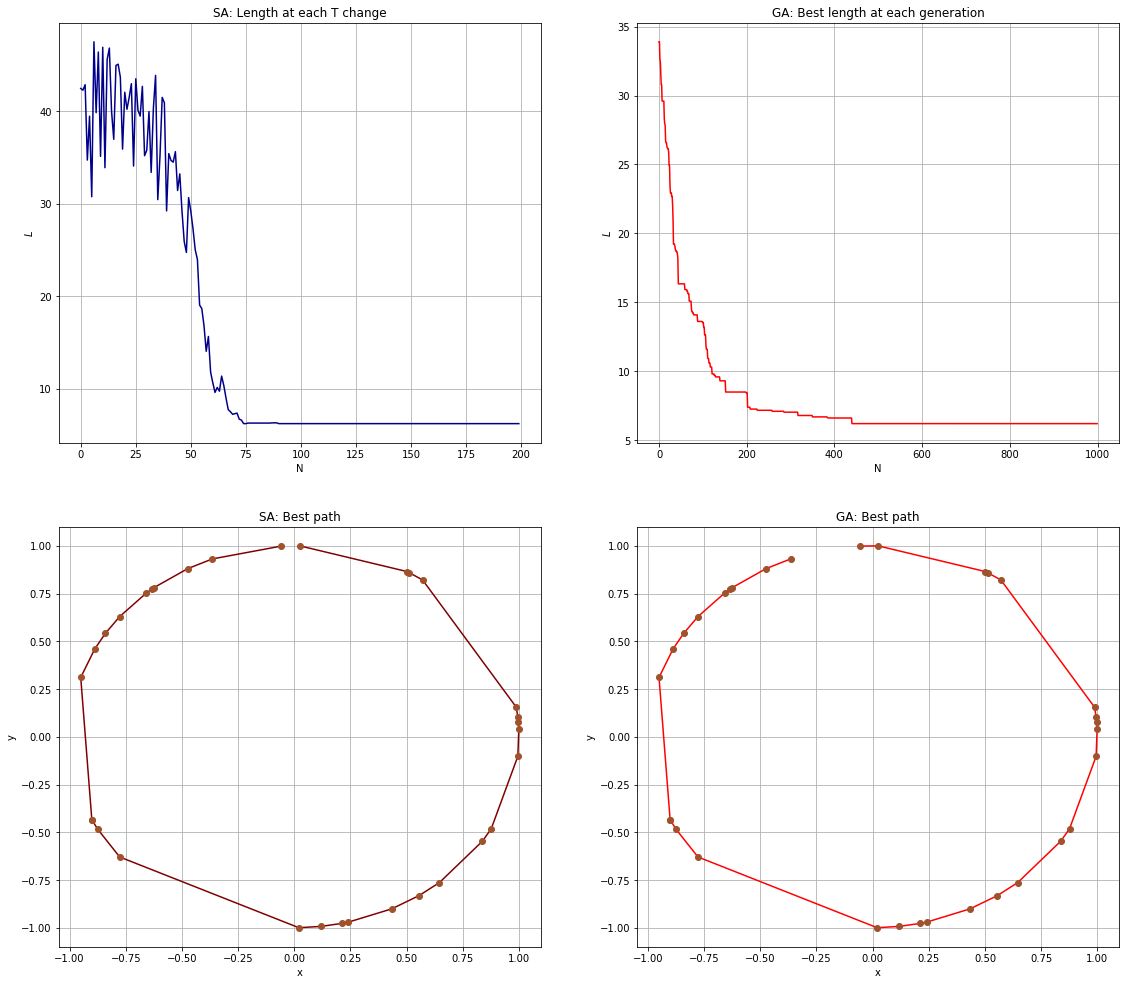

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.arange(200)
L=np.loadtxt("L_round.dat")
x_best, y_best=np.loadtxt("coord_best_round.dat", unpack=True)

xG = np.arange(1000)
LG=np.loadtxt("L_round.GA")
x_bestG, y_bestG=np.loadtxt("coord_best_round.GA", unpack=True)

fig=plt.figure(figsize=(19,17))
plt.subplot(221)
plt.plot(x, L, color="darkblue")
plt.xlabel('N')
plt.ylabel('$L$')
plt.title("SA: Length at each T change")
plt.grid(True)

plt.subplot(222)
plt.plot(xG, LG, color="red")
plt.xlabel('N')
plt.ylabel('$L$')
plt.title("GA: Best length at each generation")
plt.grid(True)

plt.subplot(223)
plt.plot(x_best, y_best, color="maroon")
plt.plot(x_best, y_best, 'bo',color="sienna")
plt.xlabel('x')
plt.ylabel('y')
plt.title("SA: Best path")
plt.grid(True)

plt.subplot(224)
plt.plot(x_bestG, y_bestG, color="red")
plt.plot(x_bestG, y_bestG, 'bo',color="sienna")
plt.xlabel('x')
plt.ylabel('y')
plt.title("GA: Best path")
plt.grid(True)

print("Length of best path with SA= ", L[200-1])
print("Length of best path with GA= ", LG[1000-1])

plt.show()

- <span style="color:red">$32$ cities randomly placed in a square of side $1$ </span>

In this case we can see from the plots that the SA has a faster convergence, and find a lower minimum.

Length of best path with SA=  4.7246
Length of best path with GA=  4.7728757


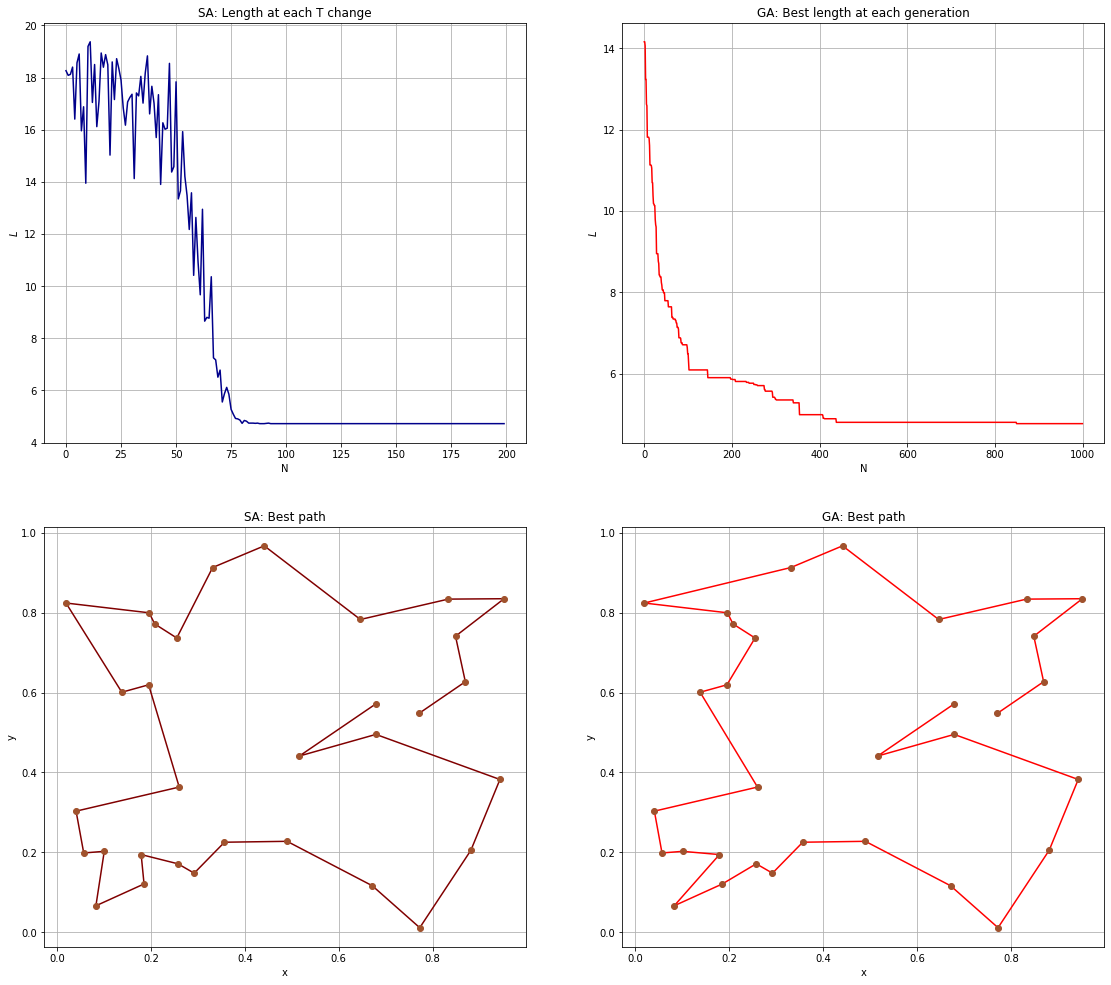

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.arange(200)

L=np.loadtxt("L_square.dat")
x_best, y_best=np.loadtxt("coord_best_square.dat", unpack=True)

xG = np.arange(1000)
LG=np.loadtxt("L_square.GA")
x_bestG, y_bestG=np.loadtxt("coord_best_square.GA", unpack=True)

fig=plt.figure(figsize=(19,17))
plt.subplot(221)
plt.plot(x, L, color="darkblue")
plt.xlabel('N')
plt.ylabel('$L$')
plt.title("SA: Length at each T change")
plt.grid(True)

plt.subplot(222)
plt.plot(xG, LG, color="red")
plt.xlabel('N')
plt.ylabel('$L$')
plt.title("GA: Best length at each generation")
plt.grid(True)

plt.subplot(223)
plt.plot(x_best, y_best, color="maroon")
plt.plot(x_best, y_best, 'bo',color="sienna")
plt.xlabel('x')
plt.ylabel('y')
plt.title("SA: Best path")
plt.grid(True)

plt.subplot(224)
plt.plot(x_bestG, y_bestG, color="red")
plt.plot(x_bestG, y_bestG, 'bo',color="sienna")
plt.xlabel('x')
plt.ylabel('y')
plt.title("GA: Best path")
plt.grid(True)

print("Length of best path with SA= ", L[200-1])
print("Length of best path with GA= ", LG[1000-1])

plt.show()

## Exercise 10.2

I've adapted the code of the exercise 9.1 to perform the search of the best path on $4$ parallel nodes. I've a random generator that's set in the same way for all the nodes that I use to set the $32$ cities in the box, of side $1$, but to run the simulation I use a different generator. This one is set differently in each node, in this way I found different paths in each "Continet". Every $50$ iterations the continents exchange randomly their best path. This exchange is oganized in this way: I have a vector v of 4 elements, filled with nubmbers from 0 to 3, each one represents a node. Each time I have to do the exchange I permutate the elements of this vector (using a generator inizialized in the same way for all the nodes), and I use the order of the elements in v to send the path: v[0] send to v[1], that send to v[2], that send to v[3], that send to v[0]. In this way each time the order is changed, and all the 4 nodes send and receive a best path to/from differet nodes.

Another change that I've made to my original code taken from exercise 9.1 was to remove the feature of saving at each generation the best individual, and in this case the cose performed better, finding a lower minimum.

I've compared these results with the ones of the excercise 09.1, running the code with the same cities, to have a realistic comparison. As you can see in the following plots all the nodes found the same result using less iterations than the non parallel code, and the best path is shorter. That means that the non parallel code found a local minimum, not global. This thing is avoided in the parallel code thanks to the exchange of the best paths, that gives the possibility to exit from a local minimum. I've also plotted the best paths, so it's possible to see that the pats are different, but the cities are the same. Obviously the number of iterations needed to converge changes with different seeds, but I've tested that the parallel code is always faster.

After these results I've decided to make a test with the non parallel code, to see if the code can find this new minimun, and it worked, but with 4000 steps, instead of 1000.(I have reported this results in exercise 9). I'm now able to say without any doubt that there is a big difference in performances, and that I've discovered that I need to use 4-times more steps to have the same results with the old code.

Length of best path for node 1=  4.7246
Length of best path for node 2=  4.7246
Length of best path for node 3=  4.7246
Length of best path for node 4=  4.7246
Length of best path for NON parallel code=  4.7383836


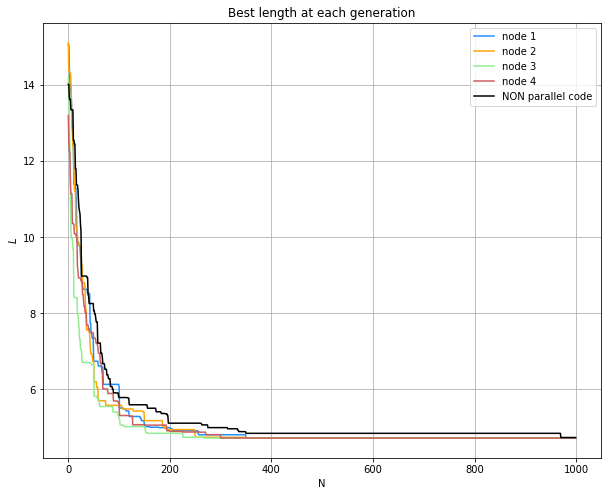

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.arange(1000)

L0=np.loadtxt("L_square.0")
L1=np.loadtxt("L_square.1")
L2=np.loadtxt("L_square.2")
L3=np.loadtxt("L_square.3")
L=np.loadtxt("L_square.GA")

fig=plt.figure(figsize=(10,8))
plt.plot(x, L0, color="dodgerblue", label="node 1")
plt.plot(x, L1, color="orange", label="node 2")
plt.plot(x, L2, color="lightgreen", label="node 3")
plt.plot(x, L3, color="indianred", label="node 4")
plt.plot(x, L, color="black", label="NON parallel code")
plt.legend()
plt.xlabel('N')
plt.ylabel('$L$')
plt.title("Best length at each generation")
plt.grid(True)

print("Length of best path for node 1= ", L0[1000-1])
print("Length of best path for node 2= ", L1[1000-1])
print("Length of best path for node 3= ", L2[1000-1])
print("Length of best path for node 4= ", L3[1000-1])
print("Length of best path for NON parallel code= ", L[1000-1])

plt.show()

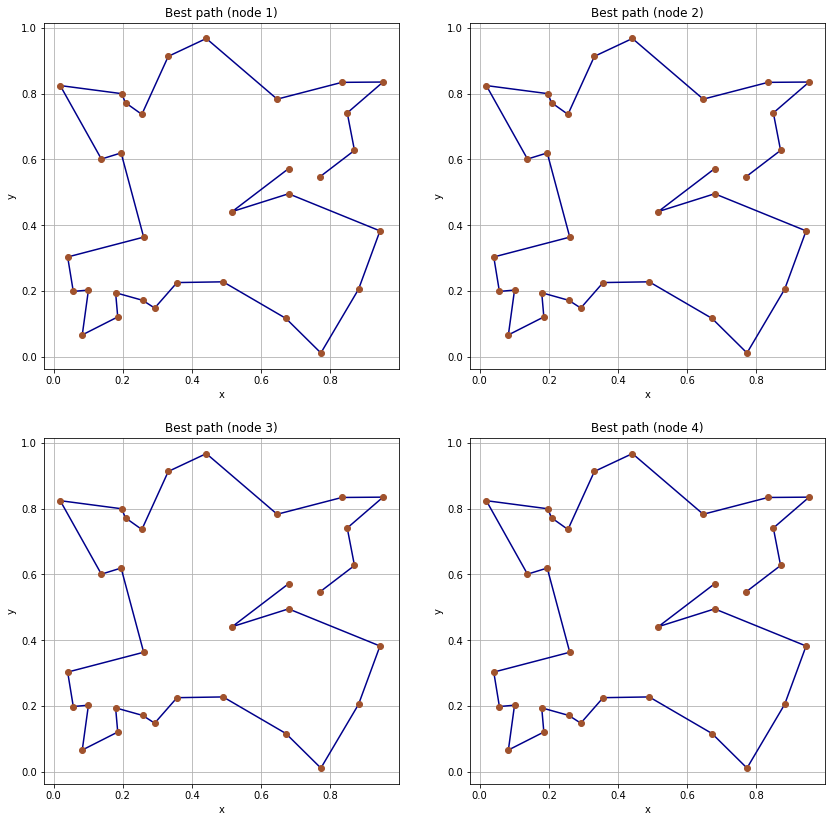

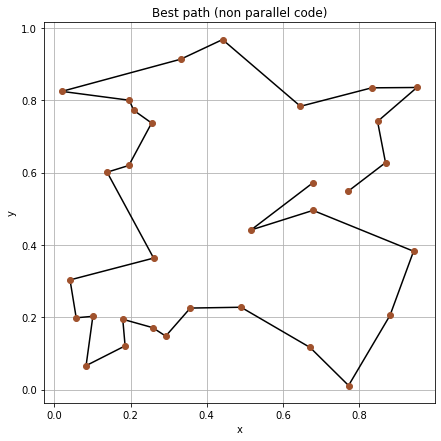

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

x_0, y_0=np.loadtxt("B_coord.0", unpack=True)
x_1, y_1=np.loadtxt("B_coord.1", unpack=True)
x_2, y_2=np.loadtxt("B_coord.2", unpack=True)
x_3, y_3=np.loadtxt("B_coord.3", unpack=True)

fig=plt.figure(figsize=(14,14))
plt.subplot(221)
plt.plot(x_0, y_0, color="darkblue")
plt.plot(x_0, y_0, 'bo',color="sienna")
plt.xlabel('x')
plt.ylabel('y')
plt.title("Best path (node 1)")
plt.grid(True)

plt.subplot(222)
plt.plot(x_1, y_1, color="darkblue")
plt.plot(x_1, y_1, 'bo',color="sienna")
plt.xlabel('x')
plt.ylabel('y')
plt.title("Best path (node 2)")
plt.grid(True)

plt.subplot(223)
plt.plot(x_2, y_2, color="darkblue")
plt.plot(x_2, y_2, 'bo',color="sienna")
plt.xlabel('x')
plt.ylabel('y')
plt.title("Best path (node 3)")
plt.grid(True)

plt.subplot(224)
plt.plot(x_3, y_3, color="darkblue")
plt.plot(x_3, y_3, 'bo',color="sienna")
plt.xlabel('x')
plt.ylabel('y')
plt.title("Best path (node 4)")
plt.grid(True)

x_best, y_best=np.loadtxt("coord_best_square.GA", unpack=True)
fig=plt.figure(figsize=(7,7))
plt.plot(x_best, y_best, color="black")
plt.plot(x_best, y_best, 'bo',color="sienna")
plt.xlabel('x')
plt.ylabel('y')
plt.title("Best path (non parallel code)")
plt.grid(True)
plt.show()